In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True, font_scale=1.5)
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cubic=pd.read_csv("cubic_zirconia.csv")

In [3]:
cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
cubic.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
cubic.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
cubic_duplicates=cubic[cubic.duplicated()]
cubic_duplicates.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [9]:
cubic.duplicated().sum()

34

In [10]:
cubic=cubic.drop_duplicates(keep='first')

In [11]:
cubic.shape

(26933, 10)

In [12]:
cubic.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


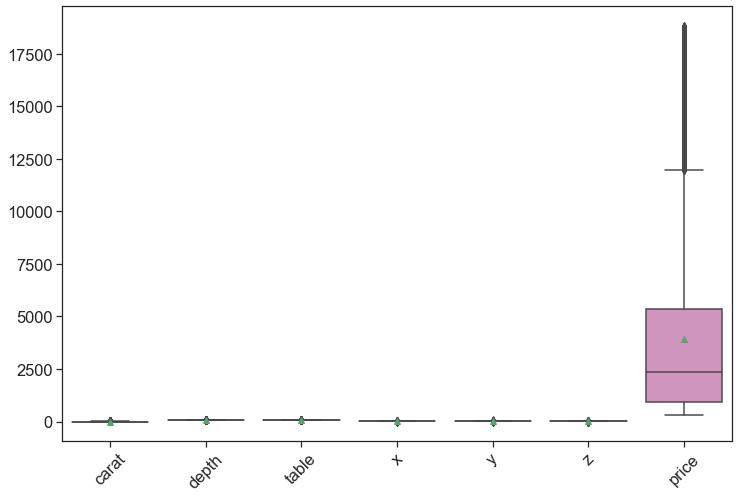

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=cubic,showmeans=True)
plt.xticks(rotation=45);

In [14]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cubic[column].describe(),end=' ')
    
    print('\n')
    print("Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(round (cubic[column].skew(skipna=True),2),end=' ')    
    plt.figure()
    mean = cubic[column].mean()
    median = cubic[column].median()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(cubic[column], kde=False, color='g')
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='b', linestyle='--');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=cubic[column],showmeans=True)
    plt.show()

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 

Skewness of carat
----------------------------------------------------------------------------
1.11 Distribution of carat
----------------------------------------------------------------------------


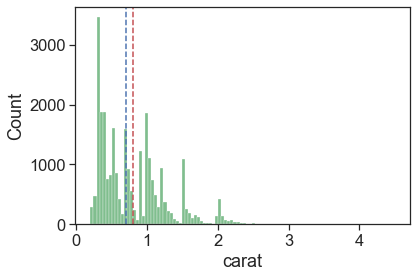

BoxPlot of carat
----------------------------------------------------------------------------


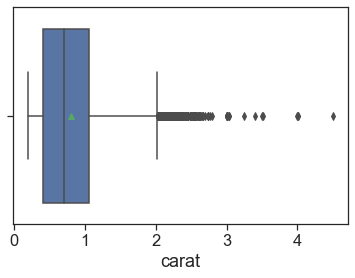

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 

Skewness of depth
----------------------------------------------------------------------------
-0.03 Distribution of depth
----------------------------------------------------------------------------


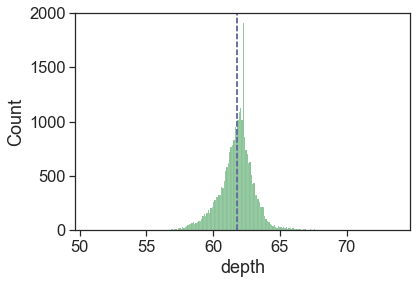

BoxPlot of depth
----------------------------------------------------------------------------


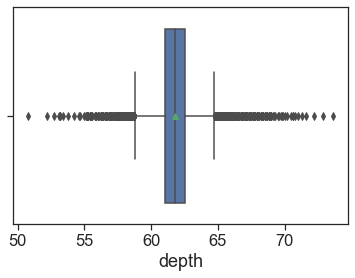

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 

Skewness of table
----------------------------------------------------------------------------
0.77 Distribution of table
----------------------------------------------------------------------------


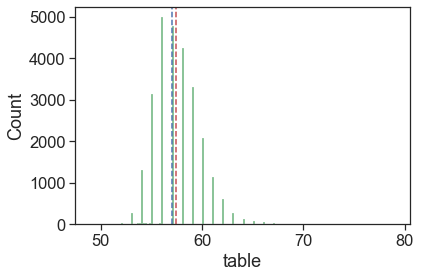

BoxPlot of table
----------------------------------------------------------------------------


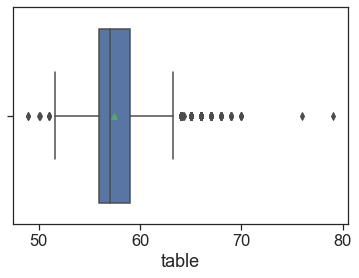

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 

Skewness of x
----------------------------------------------------------------------------
0.39 Distribution of x
----------------------------------------------------------------------------


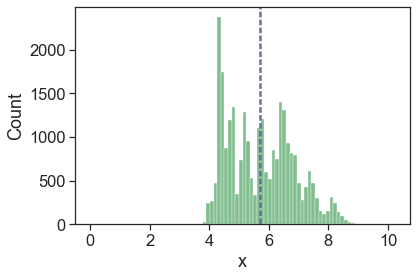

BoxPlot of x
----------------------------------------------------------------------------


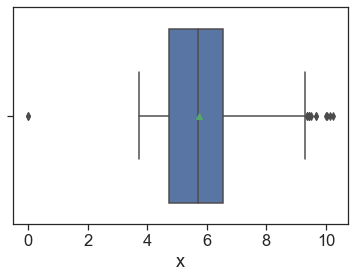

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 

Skewness of y
----------------------------------------------------------------------------
3.87 Distribution of y
----------------------------------------------------------------------------


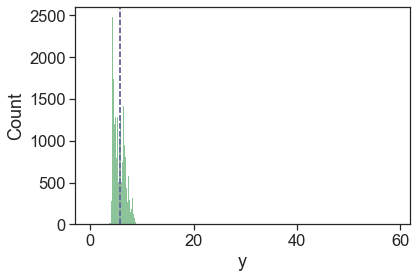

BoxPlot of y
----------------------------------------------------------------------------


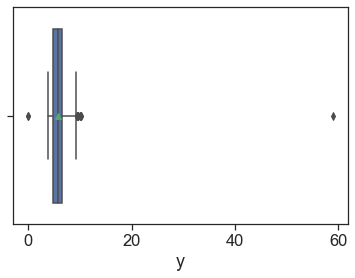

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 

Skewness of z
----------------------------------------------------------------------------
2.58 Distribution of z
----------------------------------------------------------------------------


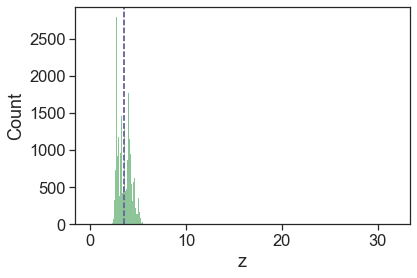

BoxPlot of z
----------------------------------------------------------------------------


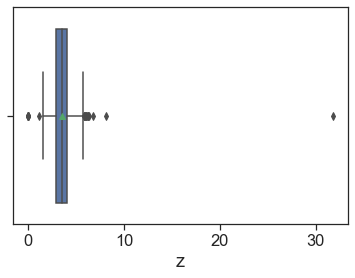

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64 

Skewness of price
----------------------------------------------------------------------------
1.62 Distribution of price
----------------------------------------------------------------------------


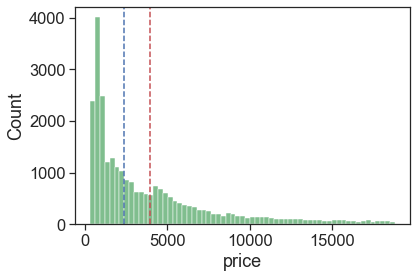

BoxPlot of price
----------------------------------------------------------------------------


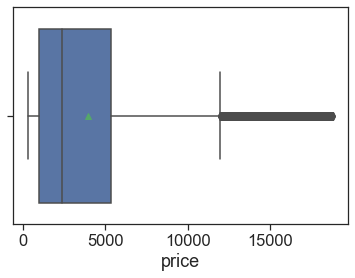

In [15]:
allcolumns=cubic[['carat','depth','table','x','y','z','price']]
for x in allcolumns:
    univariateAnalysis_numeric(x,50)

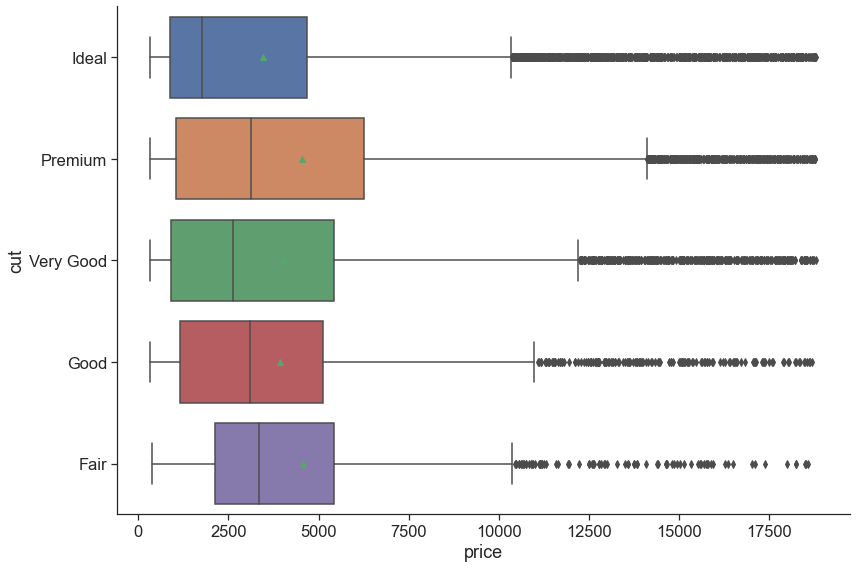

In [16]:
sns.catplot(x="price", y="cut",data=cubic, kind="box",height=8, aspect=1.5,showmeans=True);

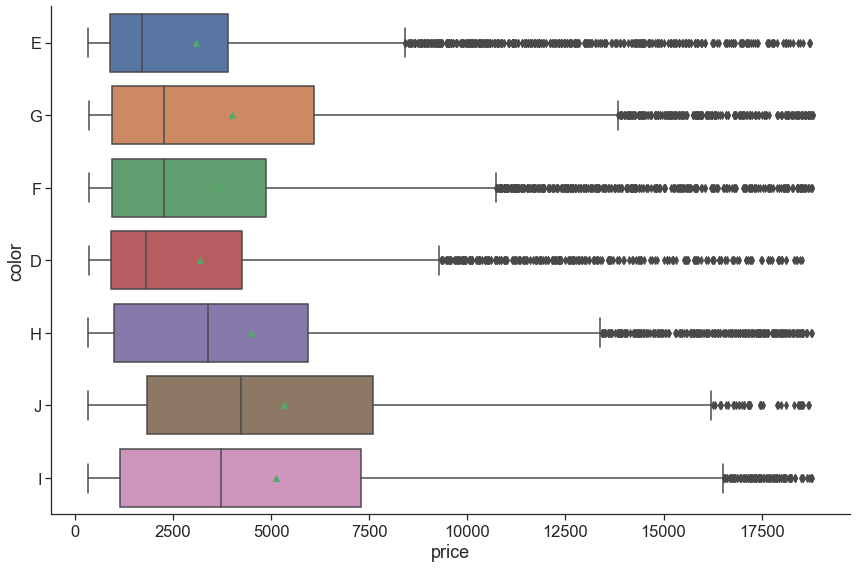

In [17]:
sns.catplot(x="price", y="color",data=cubic, kind="box",height=8, aspect=1.5,showmeans=True);

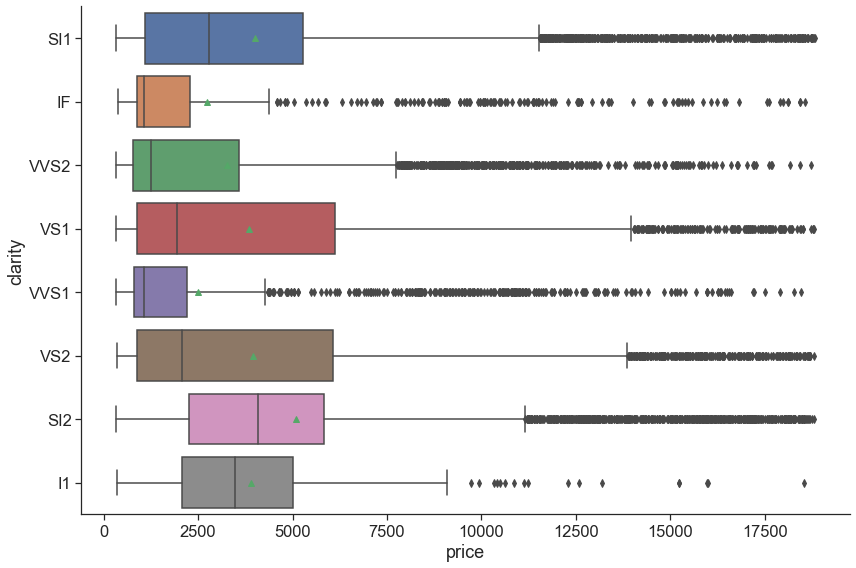

In [18]:
sns.catplot(x="price", y="clarity",data=cubic, kind="box",height=8, aspect=1.5,showmeans=True);

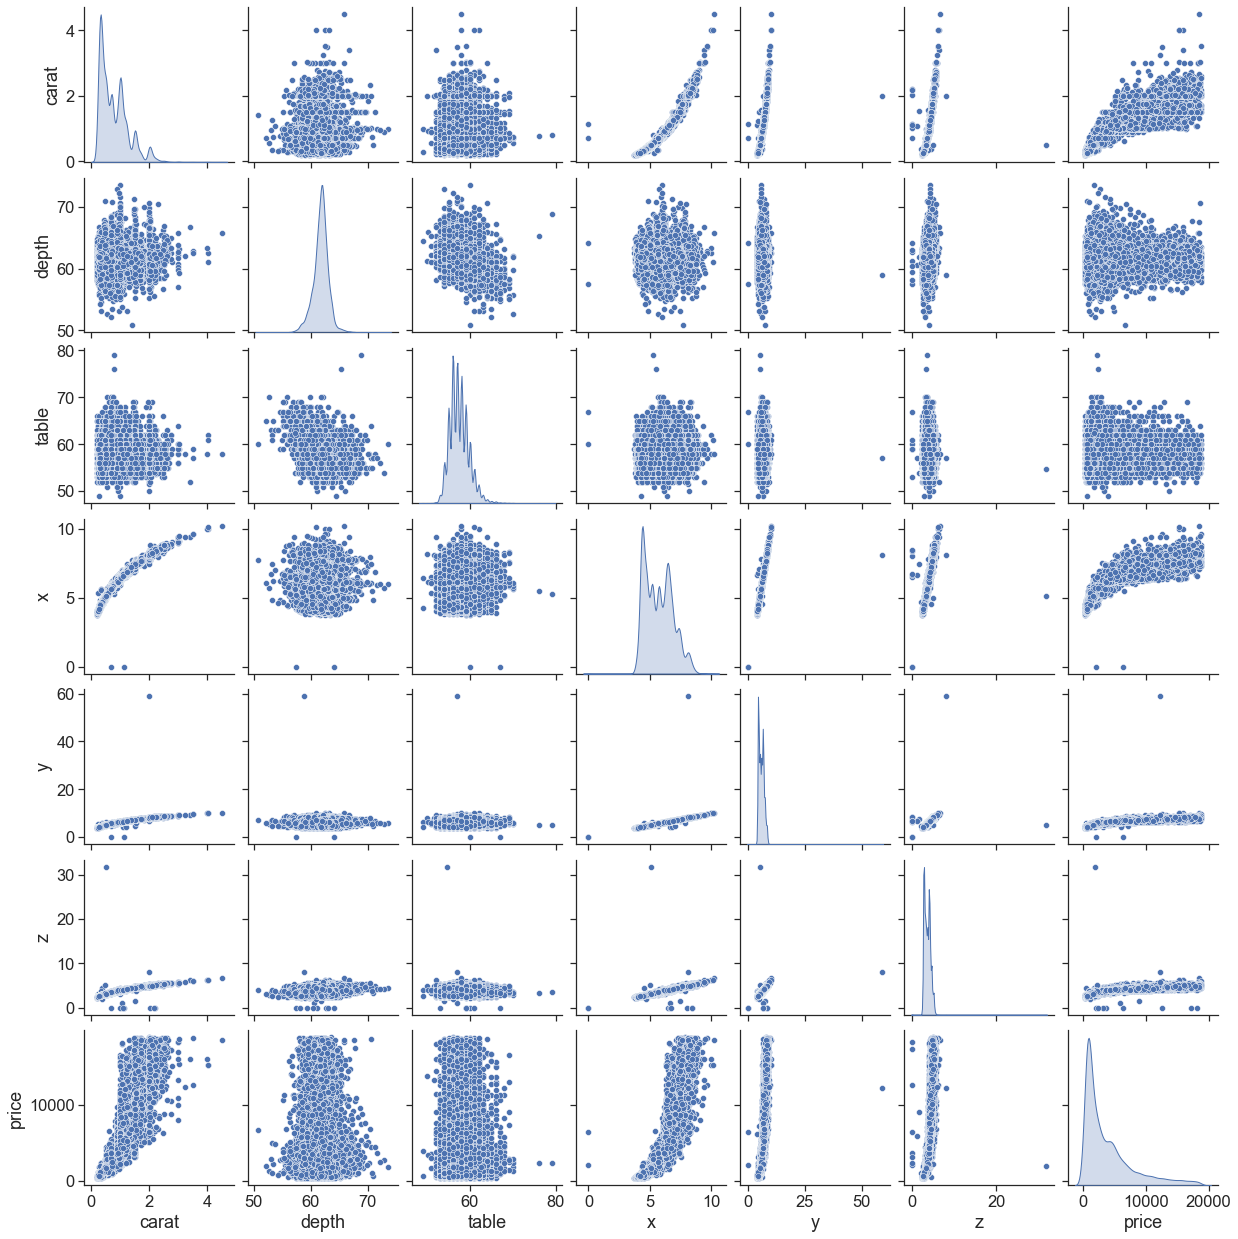

In [19]:
sns.pairplot(cubic[cubic.dtypes[(cubic.dtypes=='int64')|(cubic.dtypes=='float64')].index],diag_kind='kde')
plt.show()

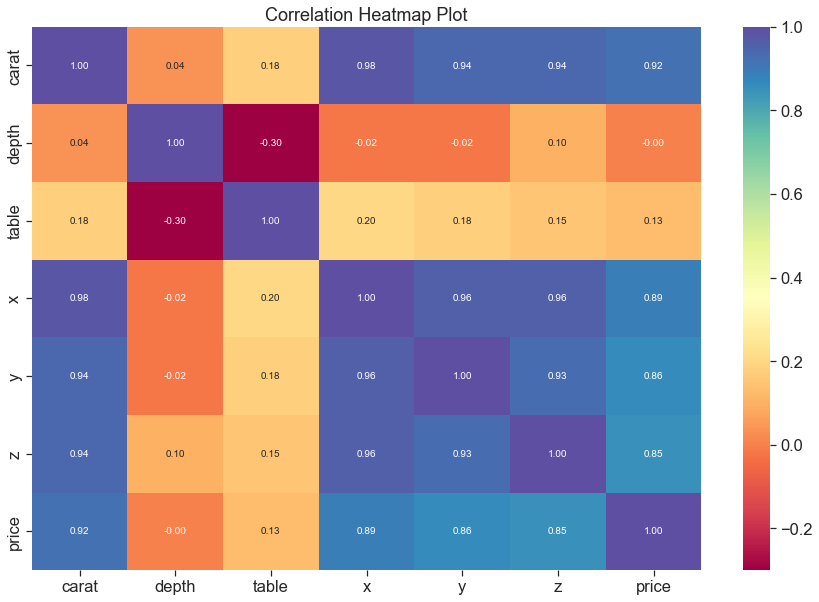

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cubic.corr(),2),fmt='.2f',annot=True,cmap='Spectral')
plt.title('Correlation Heatmap Plot')
plt.show()

In [21]:
SI = SimpleImputer(strategy='median')

In [22]:
cubic.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [23]:
cubic['depth']=cubic['depth'].fillna(cubic.depth.median())

In [24]:
cubic.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
cubic.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [26]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR),
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [27]:
for feature in cubic[['carat','depth','table','x','y','z','price']]: 
    lr,ur=treat_outlier(cubic[feature])
    cubic[feature]=np.where(cubic[feature]>ur,ur,cubic[feature])
    cubic[feature]=np.where(cubic[feature]<lr,lr,cubic[feature])

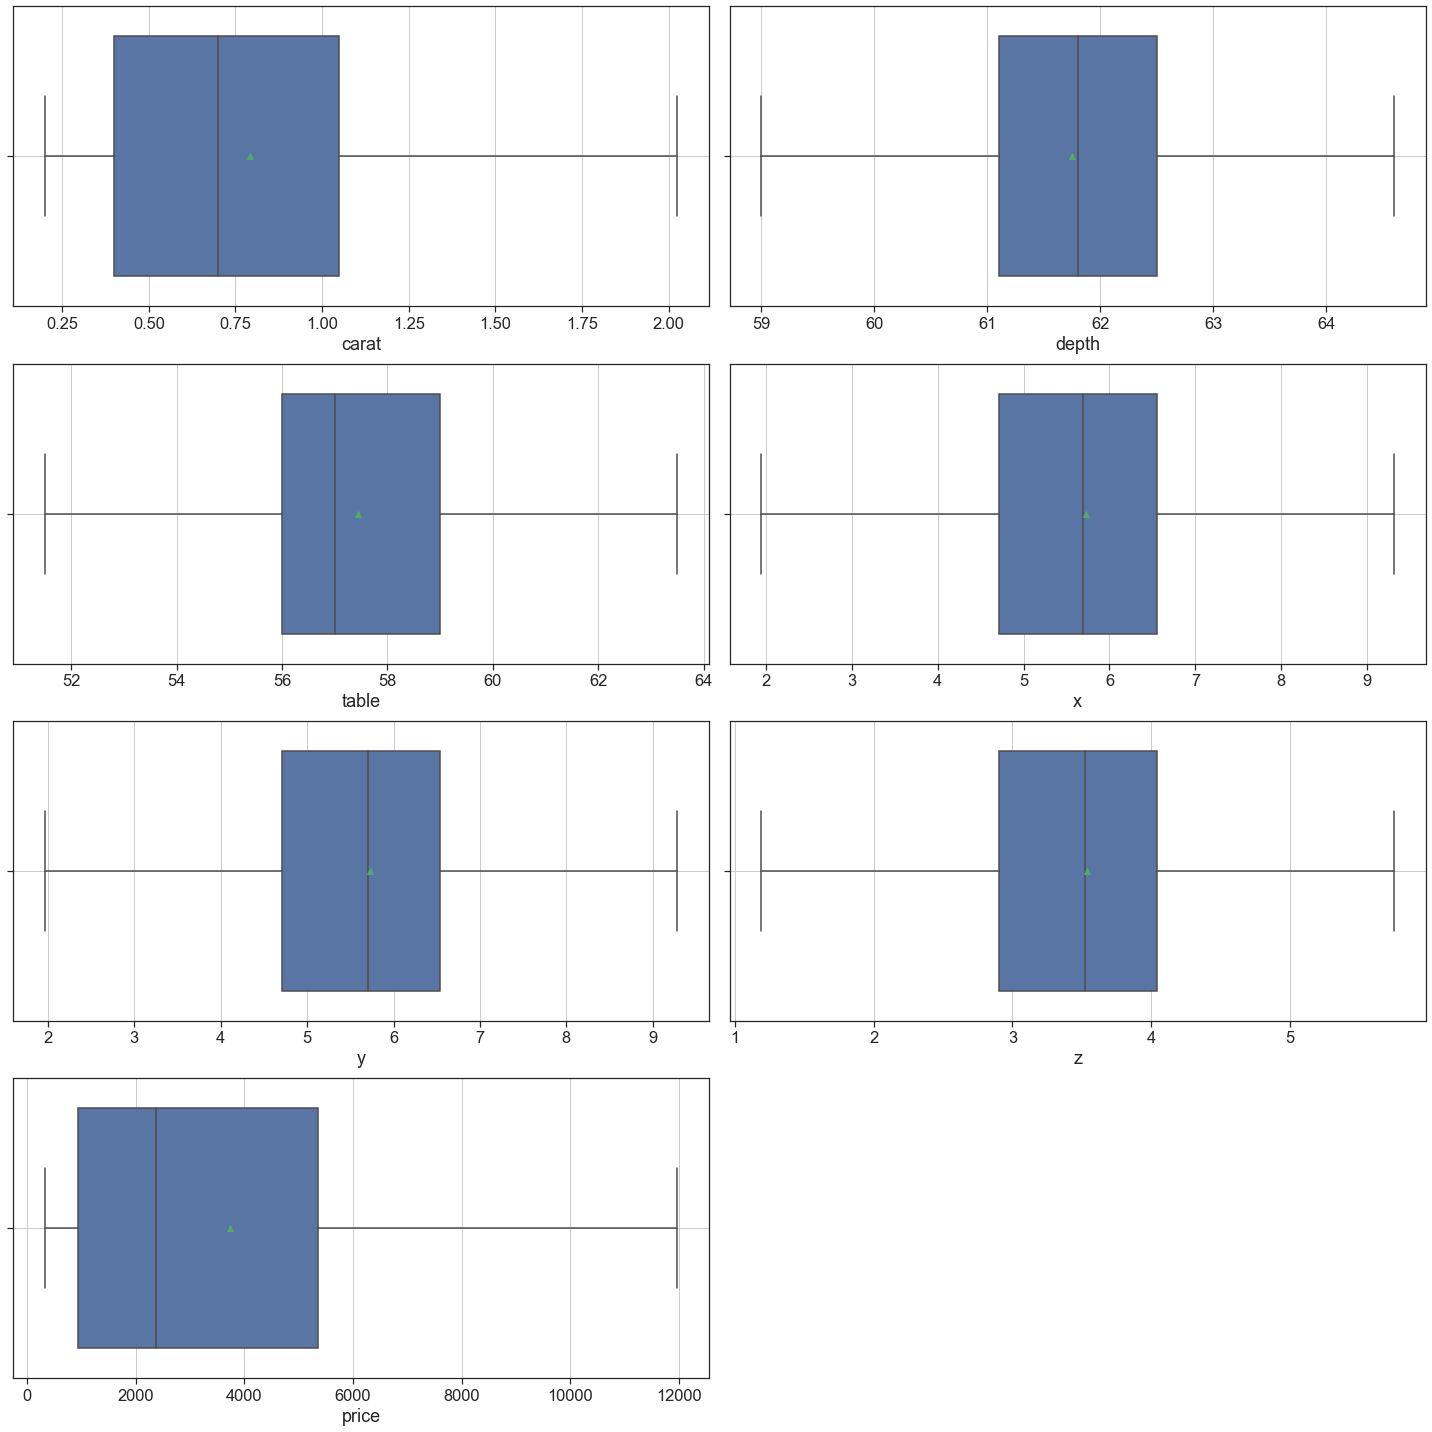

In [28]:
data_plot=cubic[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]],showmeans=True,)
    plt.grid()
    plt.tight_layout()

In [29]:
cubic.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.200,0.40,0.70,1.05,2.025
depth,26933.0,61.750462,1.218530,59.000,61.10,61.80,62.50,64.600
table,26933.0,57.435544,2.157119,51.500,56.00,57.00,59.00,63.500
x,26933.0,5.729323,1.126175,1.950,4.71,5.69,6.55,9.310
y,26933.0,5.731255,1.118155,1.965,4.71,5.70,6.54,9.285
z,26933.0,3.536928,0.696753,1.190,2.90,3.52,4.04,5.750
price,26933.0,3735.832213,3468.207359,326.000,945.00,2375.00,5356.00,11972.500


Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64 
 Ideal        0.401181
Premium      0.255671
Very Good    0.223778
Good         0.090410
Fair         0.028961
Name: cut, dtype: float64


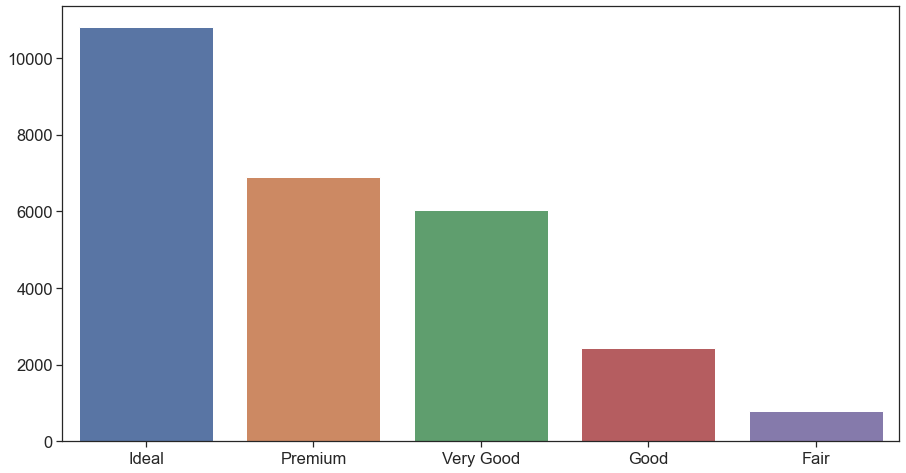

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(cubic.cut.value_counts().index,cubic.cut.value_counts().values);
print(cubic.cut.value_counts(),'\n',cubic.cut.value_counts(normalize=True));
#cubic['cut'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64 
 SI1     0.243753
VS2     0.226228
SI2     0.169458
VS1     0.151747
VVS2    0.093937
VVS1    0.068281
IF      0.033082
I1      0.013515
Name: clarity, dtype: float64


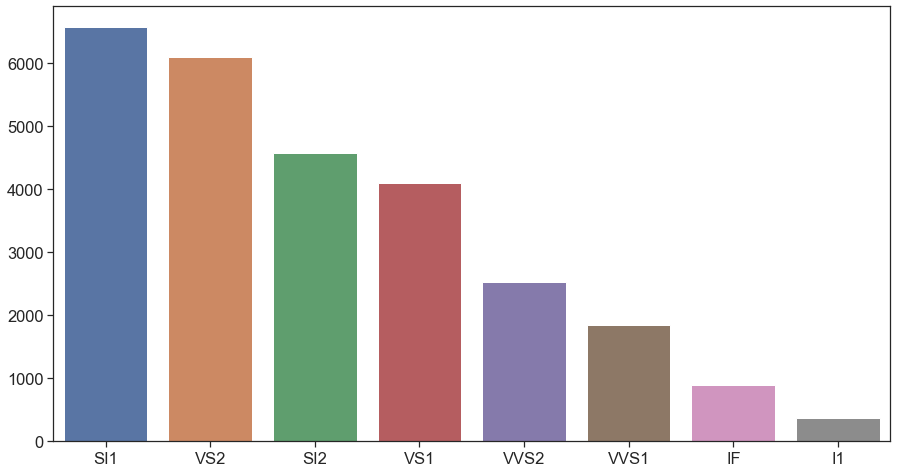

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(cubic.clarity.value_counts().index,cubic.clarity.value_counts().values);
print(cubic.clarity.value_counts(),'\n',cubic.clarity.value_counts(normalize=True));
#cubic['clarity'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64 
 G    0.209891
E    0.182527
F    0.175361
H    0.152044
D    0.124049
I    0.102662
J    0.053466
Name: color, dtype: float64


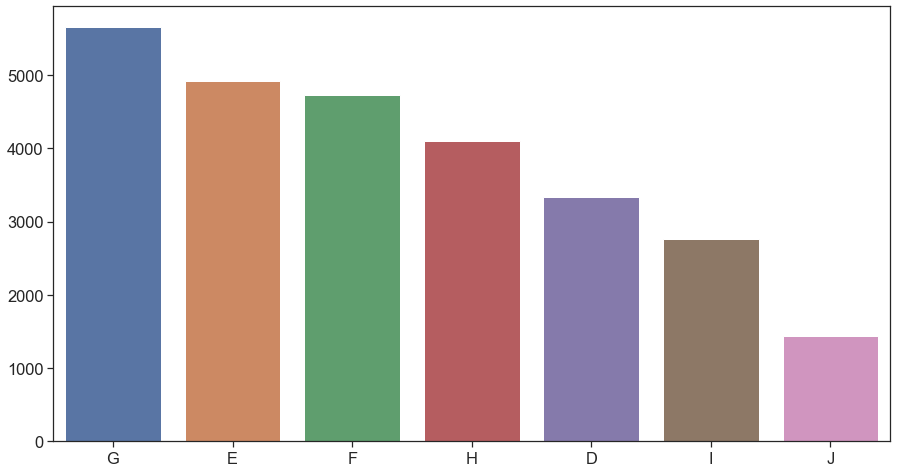

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(cubic.color.value_counts().index,cubic.color.value_counts().values);
print(cubic.color.value_counts(),'\n',cubic.color.value_counts(normalize=True));
#cubic['color'].value_counts()

In [33]:
cubic_new=pd.get_dummies(cubic,columns=['cut','color','clarity'],drop_first=True)
cubic_new.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
pd.set_option('max_columns',None)
cubic_new.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [35]:
cubic_new.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [36]:
X=cubic_new.drop('price',axis=1)
y=cubic_new.pop('price')

In [37]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [38]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("train_labels",train_labels.shape)
print("test_labels",test_labels.shape)

X_train (18853, 23)
X_test (8080, 23)
train_labels (18853,)
test_labels (8080,)


In [39]:
rm=LinearRegression()
rm.fit(X_train,train_labels)

LinearRegression()

In [40]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,rm.coef_[idx]))

The coefficient for carat is 9126.838398222511
The coefficient for depth is -14.941124632249792
The coefficient for table is -18.577261504926923
The coefficient for x is -1190.1742366645178
The coefficient for y is 837.618693036342
The coefficient for z is -164.16648957856268
The coefficient for cut_Good is 481.8102412532814
The coefficient for cut_Ideal is 714.6998781457953
The coefficient for cut_Premium is 674.826092134647
The coefficient for cut_Very Good is 606.928584669933
The coefficient for color_E is -181.90431079948075
The coefficient for color_F is -256.81037217725117
The coefficient for color_G is -429.3834073891257
The coefficient for color_H is -855.9903115757791
The coefficient for color_I is -1323.9248545235425
The coefficient for color_J is -1928.0464260478532
The coefficient for clarity_IF is 4004.01986902792
The coefficient for clarity_SI1 is 2519.9165876353454
The coefficient for clarity_SI2 is 1684.4613731270153
The coefficient for clarity_VS1 is 3342.5766284277374

In [41]:
intercept=rm.intercept_
print("The intercept value is {}".format(intercept))

The intercept value is -1851.299249129188


In [42]:
# R square on training data
rm.score(X_train,train_labels)#R-sqr

0.9402044588687953

In [43]:
# R square on testing data
rm.score(X_test,test_labels)

0.9419074345242372

In [44]:
#RMSE on Training data
predicted_train=rm.fit(X_train, train_labels).predict(X_train)
np.sqrt(mean_squared_error(train_labels,predicted_train))

847.4559983112275

In [45]:
#RMSE on Testing data
predicted_test=rm.fit(X_test, test_labels).predict(X_test)
np.sqrt(mean_squared_error(test_labels,predicted_test))

833.4195424458684

In [46]:
data_train=pd.concat([X_train,train_labels],axis=1)
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"},inplace = True)

In [47]:
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2', data = data_train).fit()
lm1.params

Intercept      -1851.299249
carat           9126.838398
depth            -14.941125
table            -18.577262
x              -1190.174237
y                837.618693
z               -164.166490
cut_Good         481.810241
cut_Ideal        714.699878
cut_Premium      674.826092
cut_VeryGood     606.928585
color_E         -181.904311
color_F         -256.810372
color_G         -429.383407
color_H         -855.990312
color_I        -1323.924855
color_J        -1928.046426
clarity_IF      4004.019869
clarity_SI1     2519.916588
clarity_SI2     1684.461373
clarity_VS1     3342.576628
clarity_VS2     3039.932917
clarity_VVS1    3772.305053
clarity_VVS2    3757.779308
dtype: float64

In [48]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:29:35   Log-Likelihood:            -1.5386e+05
No. Observations:               18853   AIC:                         3.078e+05
Df Residuals:                   18829   BIC:                         3.080e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1851.2992    661.193     -2.800   

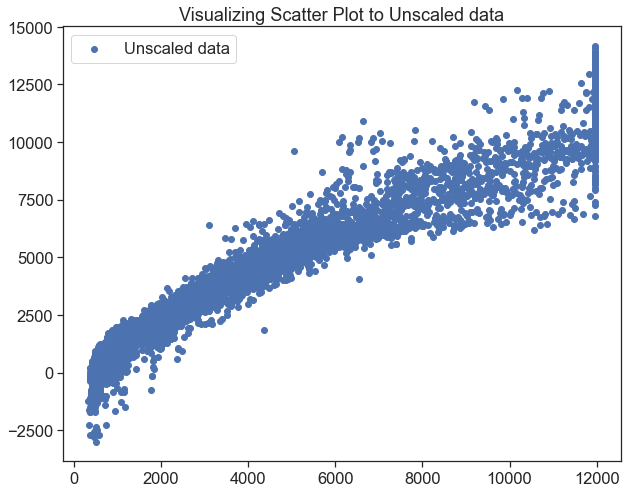

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(test_labels,rm.predict(X_test),  label='Unscaled data')
plt.title('Visualizing Scatter Plot to Unscaled data');
plt.legend(loc='upper left')
plt.show()

In [50]:
cubic_unscaled=pd.concat([X,y],axis=1)
cubic_scaled=cubic_unscaled.apply(zscore)

In [51]:
X_scaled=cubic_scaled.drop('price',axis=1)
y_scaled=cubic_scaled.pop('price')

In [52]:
X_train_scaled,X_test_scaled,train_labels_scaled,test_labels_scaled=train_test_split(X_scaled,y_scaled,
                                                                                     test_size=0.30,random_state=1)

In [53]:
print("X_train",X_train_scaled.shape)
print("X_test",X_test_scaled.shape)
print("train_labels",train_labels_scaled.shape)
print("test_labels",test_labels_scaled.shape)

X_train (18853, 23)
X_test (8080, 23)
train_labels (18853,)
test_labels (8080,)


In [54]:
regression_model=LinearRegression()

In [55]:
regression_model.fit(X_train_scaled,train_labels_scaled)

LinearRegression()

In [56]:
for idx,col_names in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_names,rm.coef_[idx]))

The coefficient for carat is 9053.237878705944
The coefficient for depth is -5.04024379205789
The coefficient for table is -22.575565701485075
The coefficient for x is -1240.0101156700334
The coefficient for y is 1029.6405015068979
The coefficient for z is -397.4826149618988
The coefficient for cut_Good is 306.23696982858513
The coefficient for cut_Ideal is 529.7177740348376
The coefficient for cut_Premium is 529.458179476132
The coefficient for cut_Very Good is 414.36915040138405
The coefficient for color_E is -244.145689787634
The coefficient for color_F is -252.19881871020698
The coefficient for color_G is -404.14776516707803
The coefficient for color_H is -834.1096294467111
The coefficient for color_I is -1300.8927377833502
The coefficient for color_J is -1839.6396134648019
The coefficient for clarity_IF is 4270.051261533025
The coefficient for clarity_SI1 is 2920.2610756045406
The coefficient for clarity_SI2 is 2126.525865949183
The coefficient for clarity_VS1 is 3710.071550266911

In [57]:
intercept_scaled=regression_model.intercept_
print("The intercept value is {}".format(intercept_scaled))

The intercept value is 0.0009803459694918194


In [58]:
# R square on training data
regression_model.score(X_train_scaled,train_labels_scaled)

0.9402044588687953

In [59]:
# R square on testing data
regression_model.score(X_test_scaled,test_labels_scaled)

0.9419074345242372

In [60]:
#RMSE on Training data
predicted_scaled_train=regression_model.fit(X_train_scaled, train_labels_scaled).predict(X_train_scaled)
np.sqrt(mean_squared_error(train_labels_scaled,predicted_scaled_train))

0.24435440092961688

In [61]:
#RMSE on Testing data
predicted_scaled_test=regression_model.fit(X_test_scaled, test_labels_scaled).predict(X_test_scaled)
np.sqrt(mean_squared_error(test_labels_scaled,predicted_scaled_test))

0.24030714682912116

In [62]:
data_train_scaled=pd.concat([X_train_scaled,train_labels_scaled],axis=1)
data_train_scaled.rename(columns = {"cut_Very Good": "cut_VeryGood"},inplace = True)
lm1_scaled = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2', data = data_train_scaled).fit()
lm1_scaled.params

Intercept       0.000980
carat           1.216120
depth          -0.005249
table          -0.011554
x              -0.386466
y               0.270050
z              -0.032981
cut_Good        0.039839
cut_Ideal       0.101005
cut_Premium     0.084883
cut_VeryGood    0.072936
color_E        -0.020260
color_F        -0.028159
color_G        -0.050418
color_H        -0.088622
color_I        -0.115864
color_J        -0.125063
clarity_IF      0.206486
clarity_SI1     0.311958
clarity_SI2     0.182211
clarity_VS1     0.345786
clarity_VS2     0.366730
clarity_VVS1    0.274347
clarity_VVS2    0.316105
dtype: float64

In [63]:
print(lm1_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:29:38   Log-Likelihood:                -184.81
No. Observations:               18853   AIC:                             417.6
Df Residuals:                   18829   BIC:                             605.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0010      0.002      0.550   

Attribute such as z has P value greater than 0.05 hence statistically their coefficients are not reliable.

In [64]:
details={'Variables before scaling':lm1.params,
         'Variables after scaling':lm1_scaled.params}
df = pd.DataFrame(details)
print(df)

              Variables before scaling  Variables after scaling
Intercept                 -1851.299249                 0.000980
carat                      9126.838398                 1.216120
depth                       -14.941125                -0.005249
table                       -18.577262                -0.011554
x                         -1190.174237                -0.386466
y                           837.618693                 0.270050
z                          -164.166490                -0.032981
cut_Good                    481.810241                 0.039839
cut_Ideal                   714.699878                 0.101005
cut_Premium                 674.826092                 0.084883
cut_VeryGood                606.928585                 0.072936
color_E                    -181.904311                -0.020260
color_F                    -256.810372                -0.028159
color_G                    -429.383407                -0.050418
color_H                    -855.990312  

In [65]:
y_pred = rm.predict(X_test)

In [66]:
y_pred_scaled=regression_model.predict(X_test_scaled)

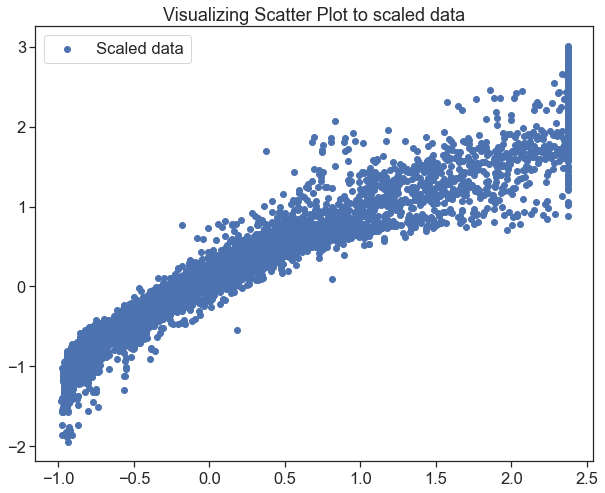

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(test_labels_scaled,y_pred_scaled,  label='Scaled data')
plt.title('Visualizing Scatter Plot to scaled data');
plt.legend(loc='upper left')
plt.show()

In [68]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,train_labels)
        scores_train.append(i.score(X_train, train_labels))
        scores_test.append(i.score(X_test, test_labels))
        rmse_train.append(np.sqrt(mean_squared_error(train_labels,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(test_labels,i.predict(X_test))))
 
    else :
        i.fit(X_train_scaled,train_labels_scaled)
        scores_train.append(i.score(X_train_scaled, train_labels_scaled))
        scores_test.append(i.score(X_test_scaled, test_labels_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(train_labels_scaled,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(test_labels_scaled,i.predict(X_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        847.455998  837.314619        0.940204    0.941907
Decision Tree Regressor    3.062915  707.148496        0.999999    0.958565
Random Forest Regressor  180.355383  537.978991        0.997292    0.976019
ANN Regressor              0.108434    0.127602        0.988225    0.983772


In [69]:
vif = [variance_inflation_factor(X_scaled.values, ix) for ix in range(X_scaled.shape[1])] 

In [70]:
i=0
print("Variance Inflation Factor")
for column in X_scaled.columns:
    if i < 23:
        print (column ,"--->", round(vif[i],2))
        i = i+1

Variance Inflation Factor
carat ---> 32.14
depth ---> 2.85
table ---> 1.81
x ---> 443.16
y ---> 436.35
z ---> 105.9
cut_Good ---> 4.05
cut_Ideal ---> 11.28
cut_Premium ---> 8.24
cut_Very Good ---> 7.85
color_E ---> 2.03
color_F ---> 2.02
color_G ---> 2.21
color_H ---> 1.95
color_I ---> 1.73
color_J ---> 1.43
clarity_IF ---> 3.55
clarity_SI1 ---> 14.89
clarity_SI2 ---> 11.49
clarity_VS1 ---> 10.84
clarity_VS2 ---> 14.29
clarity_VVS1 ---> 6.02
clarity_VVS2 ---> 7.61


In [71]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1851.3) * Intercept + (9126.84) * carat + (-14.94) * depth + (-18.58) * table + (-1190.17) * x + (837.62) * y + (-164.17) * z + (481.81) * cut_Good + (714.7) * cut_Ideal + (674.83) * cut_Premium + (606.93) * cut_VeryGood + (-181.9) * color_E + (-256.81) * color_F + (-429.38) * color_G + (-855.99) * color_H + (-1323.92) * color_I + (-1928.05) * color_J + (4004.02) * clarity_IF + (2519.92) * clarity_SI1 + (1684.46) * clarity_SI2 + (3342.58) * clarity_VS1 + (3039.93) * clarity_VS2 + (3772.31) * clarity_VVS1 + (3757.78) * clarity_VVS2 + 

In [72]:
for i,j in np.array(lm1_scaled.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.22) * carat + (-0.01) * depth + (-0.01) * table + (-0.39) * x + (0.27) * y + (-0.03) * z + (0.04) * cut_Good + (0.1) * cut_Ideal + (0.08) * cut_Premium + (0.07) * cut_VeryGood + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.12) * color_I + (-0.13) * color_J + (0.21) * clarity_IF + (0.31) * clarity_SI1 + (0.18) * clarity_SI2 + (0.35) * clarity_VS1 + (0.37) * clarity_VS2 + (0.27) * clarity_VVS1 + (0.32) * clarity_VVS2 + 

# Question2

In [73]:
holiday=pd.read_csv("Holiday_Package.csv")

In [74]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [75]:
holiday.drop("Unnamed: 0",axis=1,inplace=True)

In [76]:
holiday.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [77]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [78]:
holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [79]:
holiday.duplicated().sum()

0

In [80]:
holiday.shape

(872, 7)

In [81]:
holiday.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


no     471
yes    401
Name: Holliday_Package, dtype: int64 
 no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64


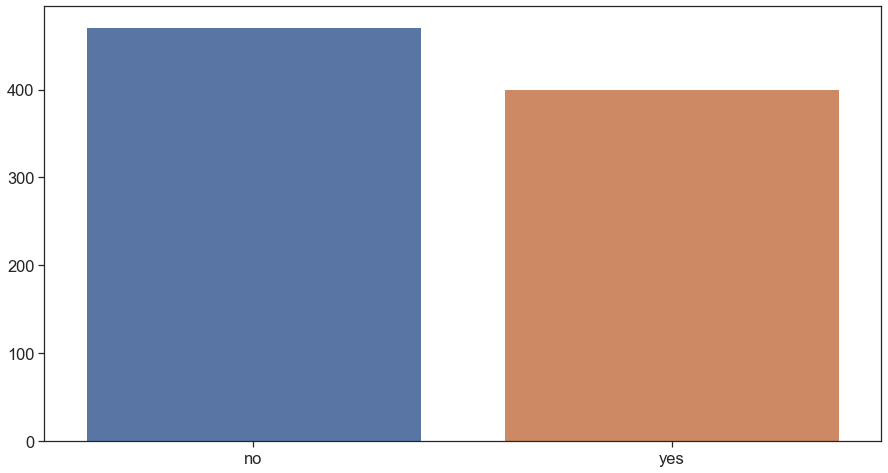

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(holiday.Holliday_Package.value_counts().index,holiday.Holliday_Package.value_counts().values);
print(holiday.Holliday_Package.value_counts(),'\n',holiday.Holliday_Package.value_counts(normalize=True));

no     656
yes    216
Name: foreign, dtype: int64 
 no     0.752294
yes    0.247706
Name: foreign, dtype: float64


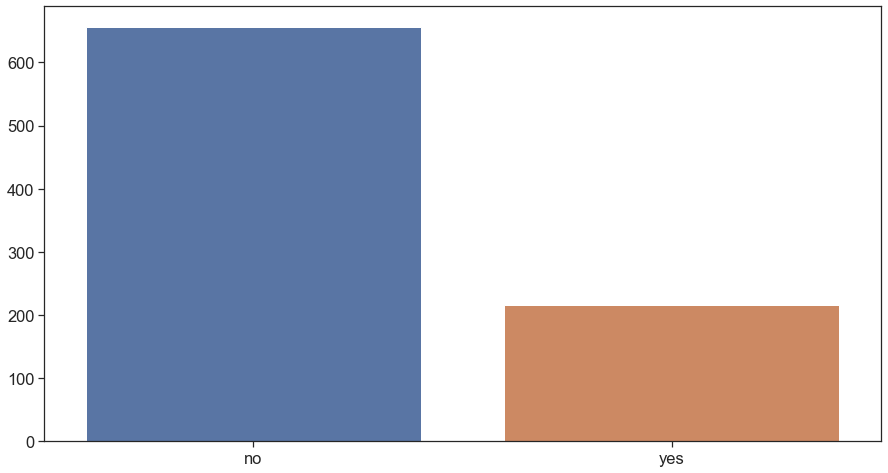

In [83]:
plt.figure(figsize=(15,8))
sns.barplot(holiday.foreign.value_counts().index,holiday.foreign.value_counts().values);
print(holiday.foreign.value_counts(),'\n',holiday.foreign.value_counts(normalize=True));

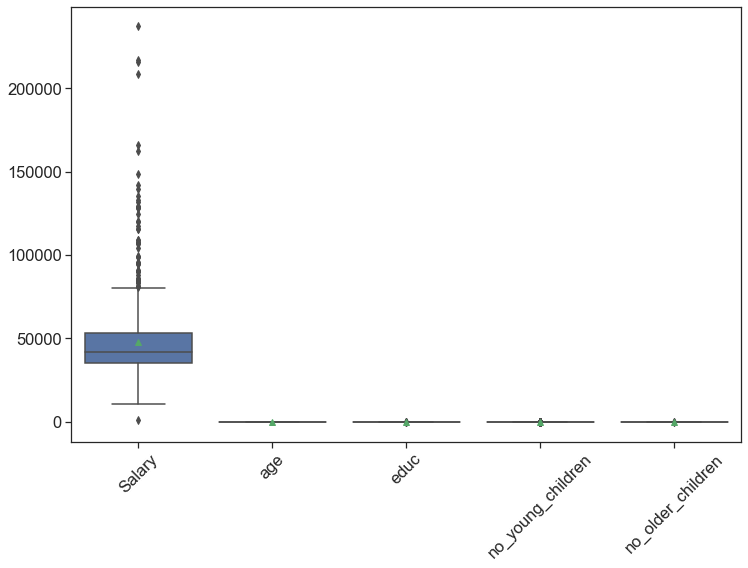

In [84]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=holiday,showmeans=True)
plt.xticks(rotation=45);

In [85]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(holiday[column].describe(),end=' ')
    
    print('\n')
    print("Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(round (holiday[column].skew(skipna=True),2),end=' ')    
    plt.figure()
    mean = holiday[column].mean()
    median = holiday[column].median()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(holiday[column], kde=False, color='g')
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='b', linestyle='--');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=holiday[column],showmeans=True)
    plt.show()

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 

Skewness of Salary
----------------------------------------------------------------------------
3.1 Distribution of Salary
----------------------------------------------------------------------------


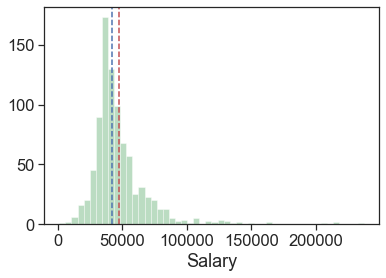

BoxPlot of Salary
----------------------------------------------------------------------------


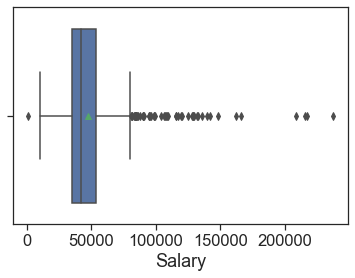

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 

Skewness of age
----------------------------------------------------------------------------
0.15 Distribution of age
----------------------------------------------------------------------------


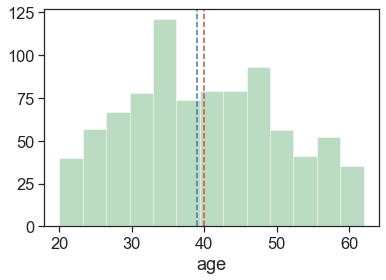

BoxPlot of age
----------------------------------------------------------------------------


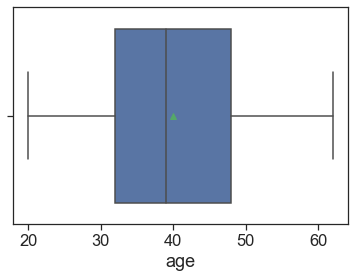

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 

Skewness of educ
----------------------------------------------------------------------------
-0.05 Distribution of educ
----------------------------------------------------------------------------


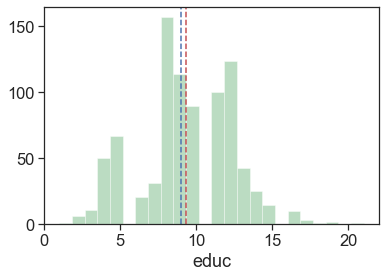

BoxPlot of educ
----------------------------------------------------------------------------


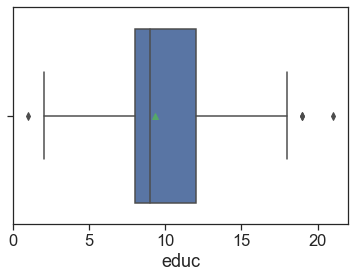

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 

Skewness of no_young_children
----------------------------------------------------------------------------
1.95 Distribution of no_young_children
----------------------------------------------------------------------------


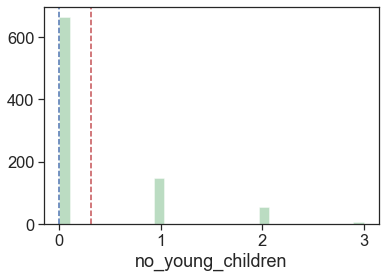

BoxPlot of no_young_children
----------------------------------------------------------------------------


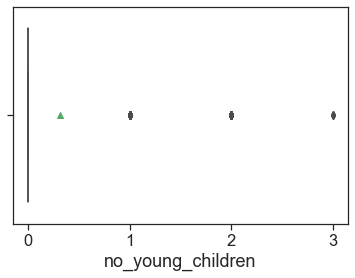

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 

Skewness of no_older_children
----------------------------------------------------------------------------
0.95 Distribution of no_older_children
----------------------------------------------------------------------------


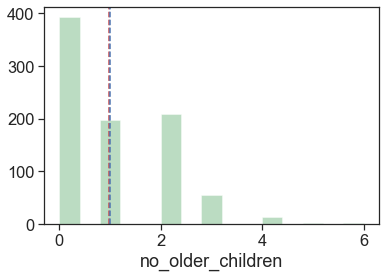

BoxPlot of no_older_children
----------------------------------------------------------------------------


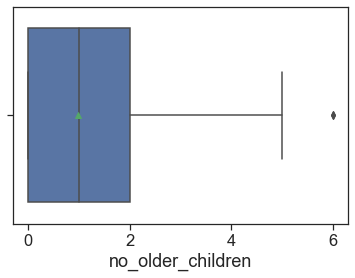

In [86]:
allcolumns=holiday[['Salary','age','educ','no_young_children','no_older_children']]
for x in allcolumns:
    univariateAnalysis_numeric(x,50)

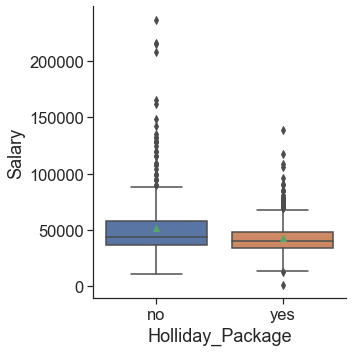

In [87]:
sns.catplot(y="Salary", x="Holliday_Package", kind="box", data=holiday,showmeans=True);

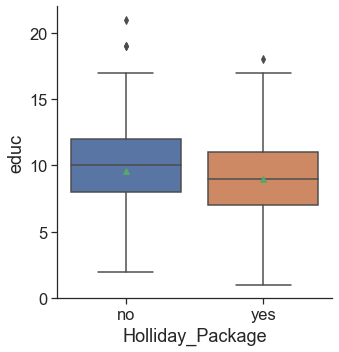

In [88]:
sns.catplot(y="educ", x="Holliday_Package", kind="box", data=holiday,showmeans=True);

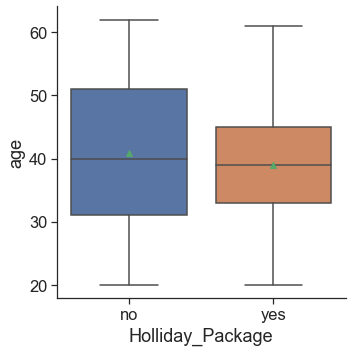

In [89]:
sns.catplot(y="age", x="Holliday_Package", kind="box", data=holiday,showmeans=True);

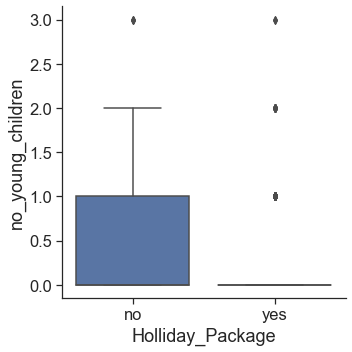

In [90]:
sns.catplot(y="no_young_children", x="Holliday_Package", kind="box", data=holiday);

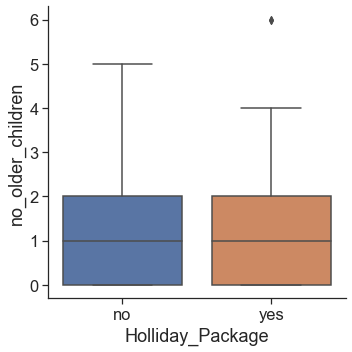

In [91]:
sns.catplot(y="no_older_children", x="Holliday_Package", kind="box", data=holiday);

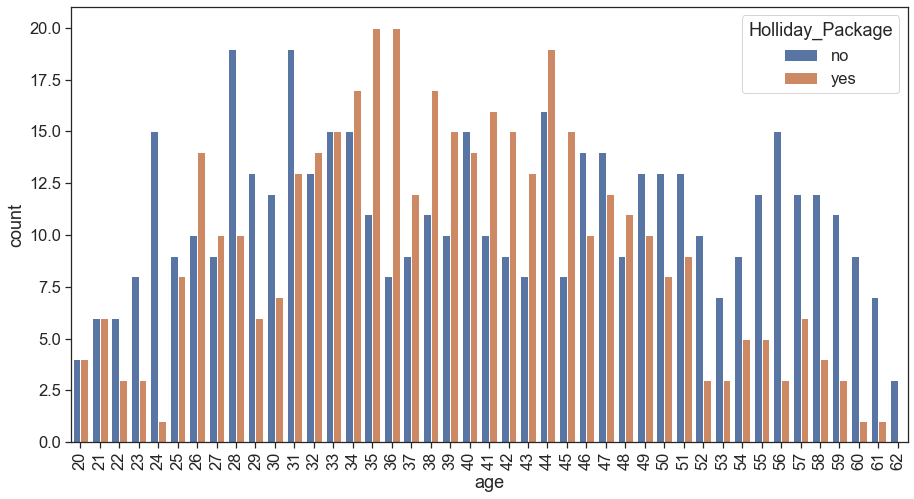

In [92]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',data=holiday,hue='Holliday_Package')
plt.xticks(rotation=90);

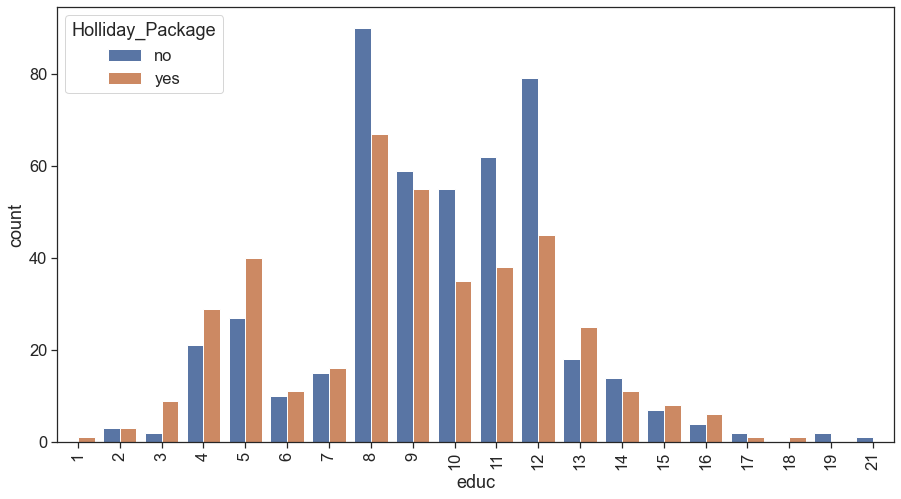

In [93]:
plt.figure(figsize=(15,8))
sns.countplot(x='educ',data=holiday,hue='Holliday_Package')
plt.xticks(rotation=90);

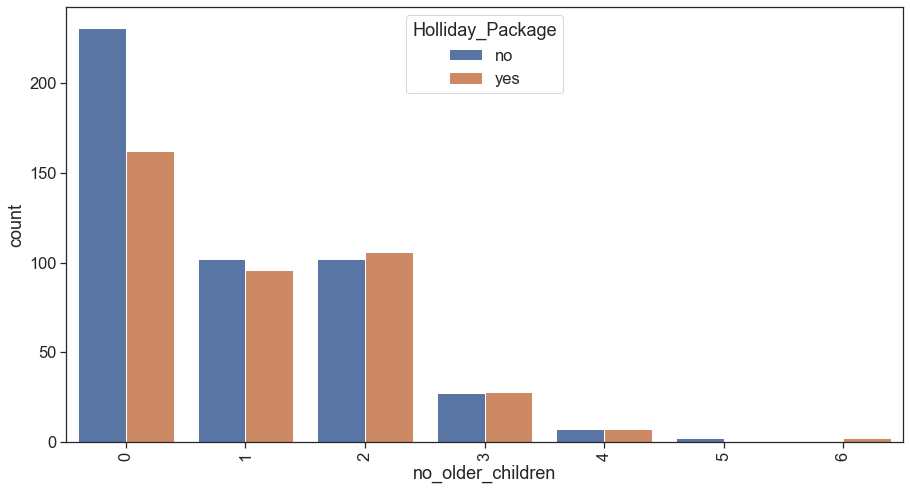

In [94]:
plt.figure(figsize=(15,8))
sns.countplot(x='no_older_children',data=holiday,hue='Holliday_Package')
plt.xticks(rotation=90);

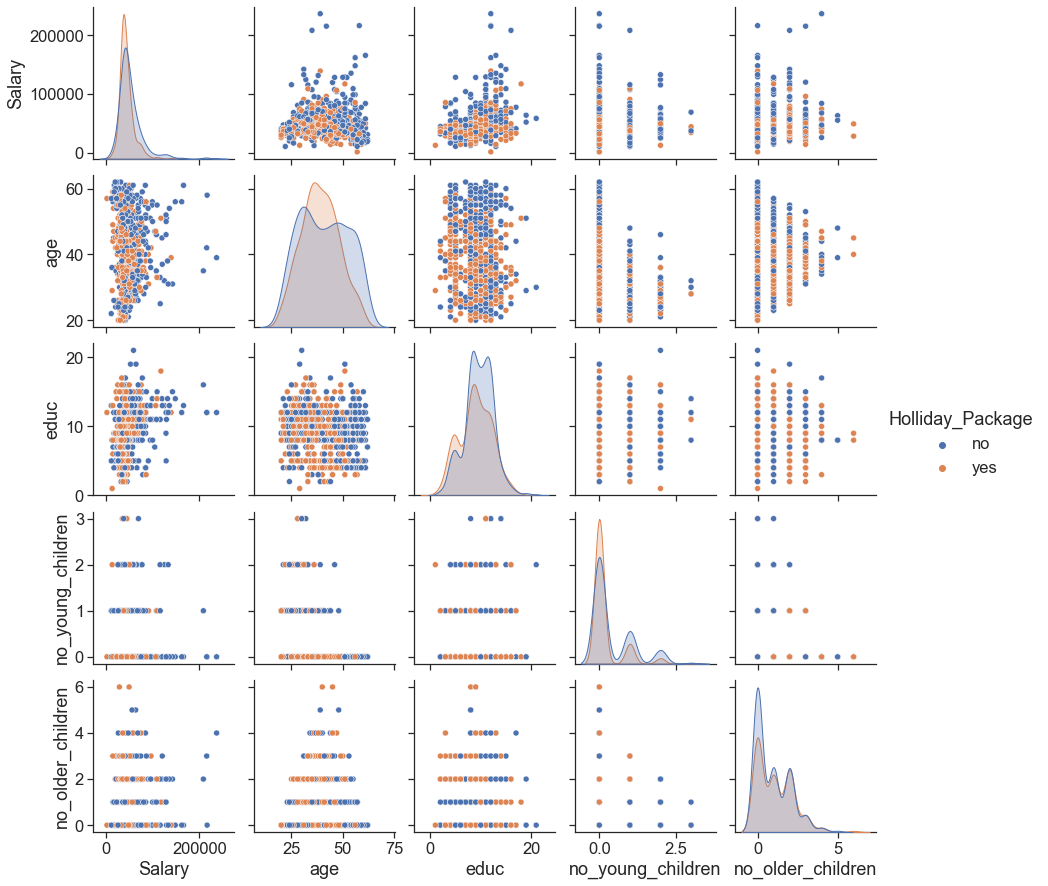

In [95]:
sns.pairplot(holiday,diag_kind='kde',hue='Holliday_Package')
plt.show()

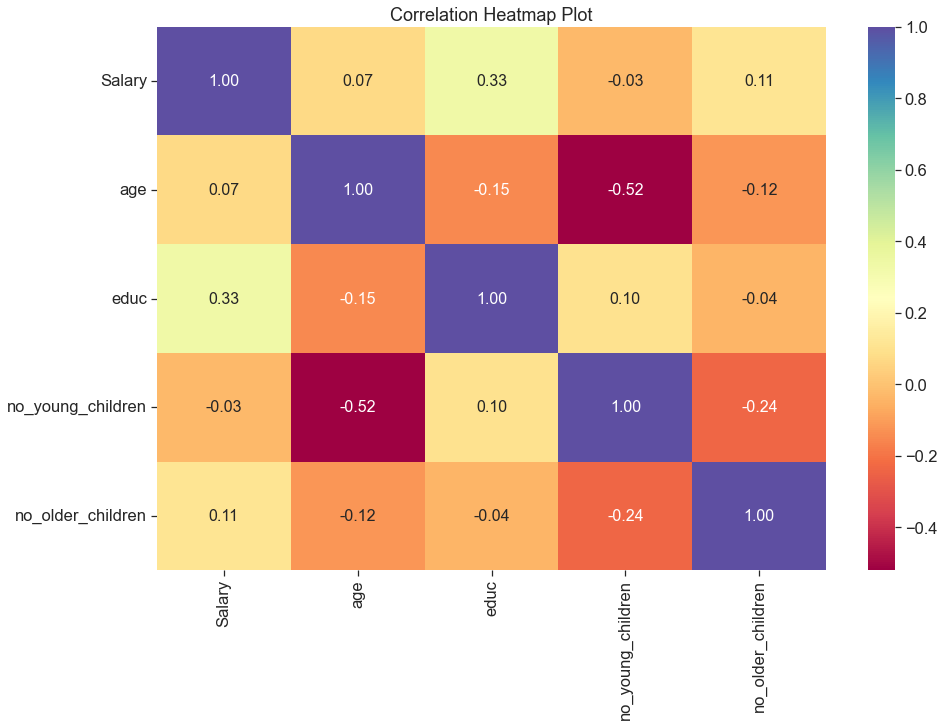

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(round(holiday.corr(),2),fmt='.2f',annot=True,cmap='Spectral',annot_kws={'size':16})
plt.title('Correlation Heatmap Plot')
plt.show()

In [97]:
for feature in holiday.columns:
    if holiday[feature].dtype=='object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holiday[feature].unique()))
        print(pd.Categorical(holiday[feature].unique()).codes)
        holiday[feature]=pd.Categorical(holiday[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [98]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [99]:
X=holiday.drop('Holliday_Package',axis=1)
y=holiday.pop('Holliday_Package')

In [103]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [104]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("train_labels",train_labels.shape)
print("test_labels",test_labels.shape)

X_train (610, 6)
X_test (262, 6)
train_labels (610,)
test_labels (262,)


In [105]:
lm=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=123)
lm.fit(X_train,train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=123,
                   solver='newton-cg', verbose=True)

In [106]:
ytrain_predict = lm.predict(X_train)
ytest_predict = lm.predict(X_test)

In [107]:
ytest_predict_prob=lm.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


In [108]:
lm.score(X_train, train_labels)

0.6672131147540984

In [109]:
lm.score(X_test, test_labels)

0.6526717557251909

In [110]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [111]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



Accuracy for Logistics Regression Model is 

 0.6672131147540984


Classification report for Logistics Regression Model Training Data is 
               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610





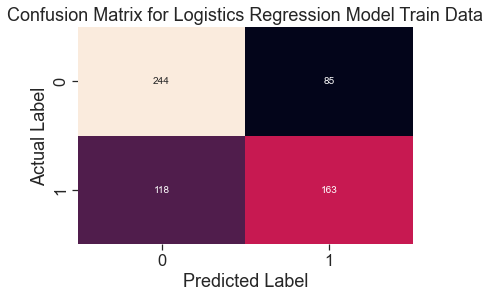

In [112]:
models_names={lm:'Logistics Regression Model'}

print('Accuracy for {} is'.format(models_names[lm]),'\n\n',accuracy_score(train_labels,ytrain_predict))
print('\n')
print('Classification report for {} Training Data is'.format(models_names[lm]),'\n',
      classification_report(train_labels,ytrain_predict))
print('\n')
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Train Data".format(models_names[lm]))
plt.show()

Accuracy for Logistics Regression Model is 

 0.6526717557251909


Classification report for Logistics Regression Model Testing Data is 

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262





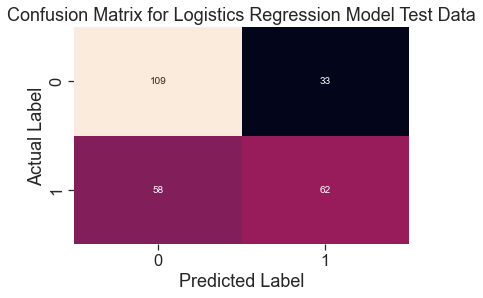

In [113]:
models_names={lm:'Logistics Regression Model'}

print('Accuracy for {} is'.format(models_names[lm]),'\n\n',accuracy_score(test_labels,ytest_predict))
print('\n')
print('Classification report for {} Testing Data is'.format(models_names[lm]),'\n\n',
      classification_report(test_labels,ytest_predict))
print('\n')
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Test Data".format(models_names[lm]))
plt.show()

Area under Curve is 0.7352594403400794


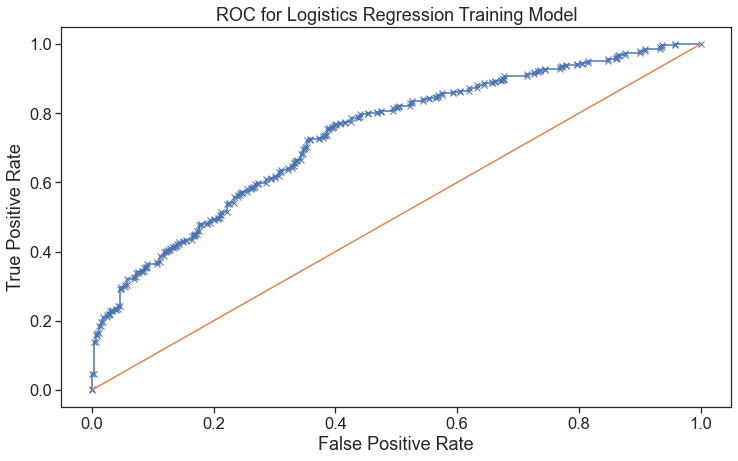

In [114]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,lm.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Logistics Regression Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(train_labels,lm.predict_proba(X_train)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistics Regression Training Model')
plt.show()

Area under Curve is 0.7168427230046949


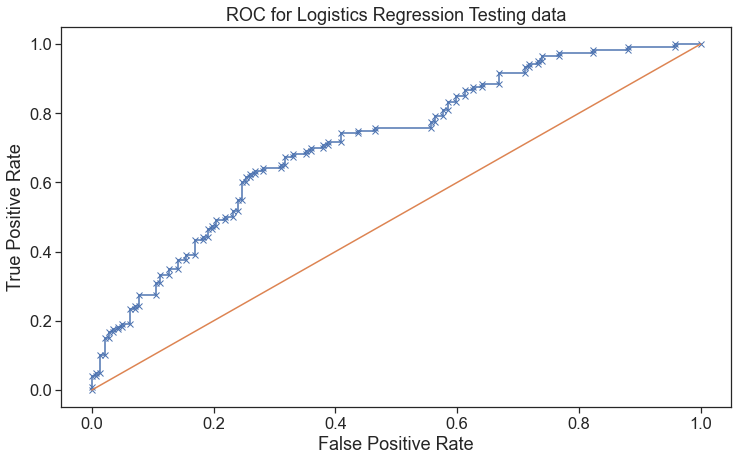

In [115]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,lm.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Logistics Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(test_labels,lm.predict_proba(X_test)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistics Regression Testing data')
plt.show()

In [116]:
grid={'penalty':['l1','l2','none'],
     'solver':['sag','liblinear','saga','ibfgs','newton-cg'],
      'max_iter':[1000,10000,100000],
     'tol':[0.0001,0.01,0.000001]}

In [117]:
grid_search=GridSearchCV(estimator=lm,param_grid=grid,cv=10,n_jobs=2,scoring='f1')

In [118]:
lmgs=grid_search.fit(X_train,train_labels)

[LibLinear]

In [119]:
print(lmgs.best_params_)
print('\n')
print(lmgs.best_estimator_)

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


LogisticRegression(max_iter=1000, n_jobs=2, penalty='l1', random_state=123,
                   solver='liblinear', verbose=True)


In [120]:
best_model=lmgs.best_estimator_

In [121]:
ytrain_predict_grid=best_model.predict(X_train)
ytest_predict_grid=best_model.predict(X_test)

In [122]:
ytest_predict_prob_grid=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_grid).head()

,0,1
0,0.673996,0.326004
1,0.577735,0.422265
2,0.685622,0.314378
3,0.528702,0.471298
4,0.543767,0.456233


Accuracy for Logistics Regression after Grid Search is 

 0.6655737704918033


Classification report for Logistics Regression after Grid Search Training Data is 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610





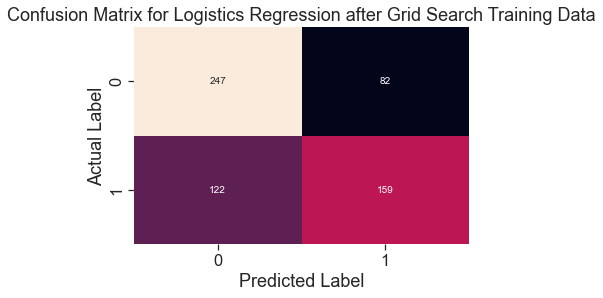

In [123]:
## Confusion matrix on the training data based on best estimator
models_names={lm:'Logistics Regression Model',lmgs:'Logistics Regression after Grid Search',}

print('Accuracy for {} is'.format(models_names[lmgs]),'\n\n',accuracy_score(train_labels,ytrain_predict_grid))
print('\n')
print('Classification report for {} Training Data is'.format(models_names[lmgs]),'\n',
      classification_report(train_labels,ytrain_predict_grid))
print('\n')
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_grid),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Training Data".format(models_names[lmgs]))
plt.show()

Accuracy for Logistics Regression after Grid Search is 

 0.6641221374045801


Classification report for Logistics Regression after Grid Search Testing Data is 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72       142
           1       0.67      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262





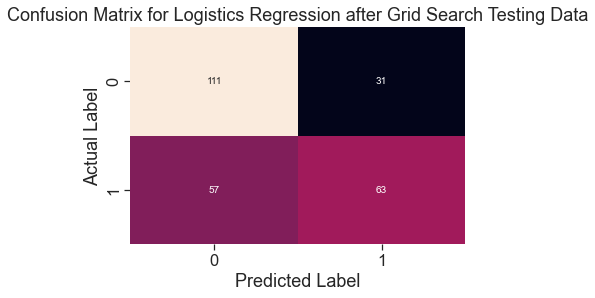

In [124]:
## Confusion matrix on the testing data based on best estimator
models_names={lm:'Logistics Regression Model',lmgs:'Logistics Regression after Grid Search',}

print('Accuracy for {} is'.format(models_names[lmgs]),'\n\n',accuracy_score(test_labels,ytest_predict_grid))
print('\n')
print('Classification report for {} Testing Data is'.format(models_names[lmgs]),'\n',
      classification_report(test_labels,ytest_predict_grid))
print('\n')
sns.heatmap(confusion_matrix(test_labels,ytest_predict_grid),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Testing Data".format(models_names[lmgs]))
plt.show()

Area under Curve is 0.7340479615788165


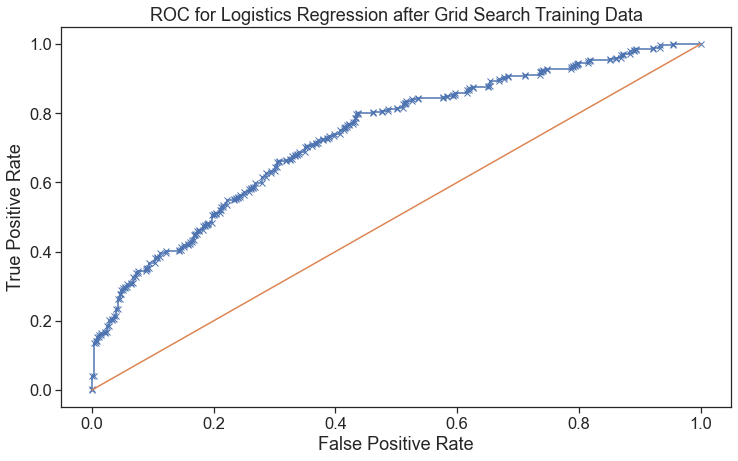

In [125]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Logistics Regression after Grid Search')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(train_labels,best_model.predict_proba(X_train)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistics Regression after Grid Search Training Data')
plt.show()

Area under Curve is 0.7171361502347419


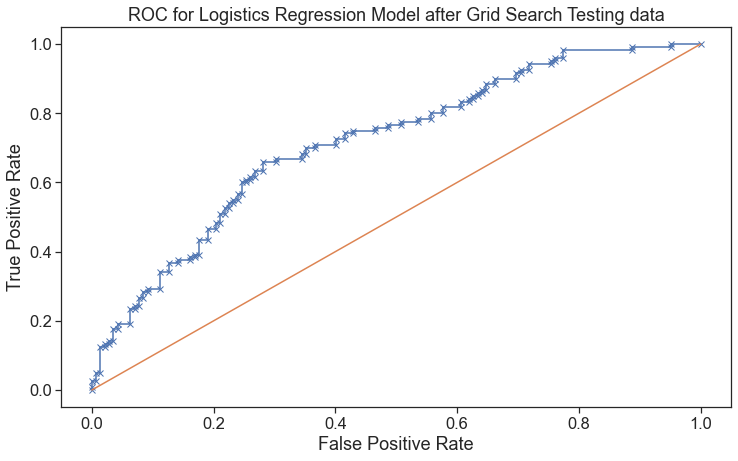

In [126]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Logistics Regression Model after Grid Search')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(test_labels,best_model.predict_proba(X_test)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistics Regression Model after Grid Search Testing data')
plt.show()

AUC for the Training Data: 0.734
AUC for the Test Data: 0.717


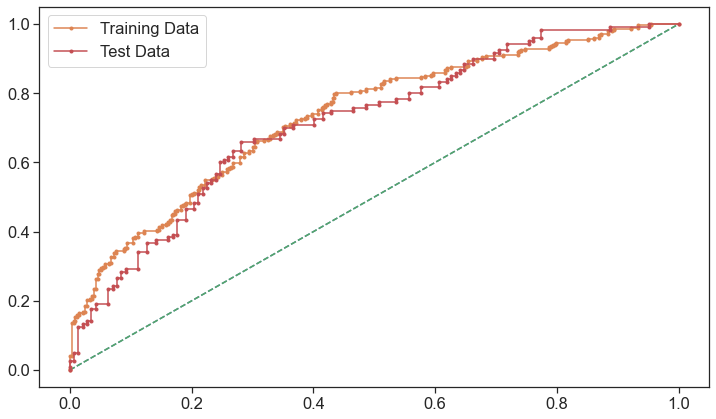

In [127]:
# AUC and ROC for the training data
plt.figure(figsize=(12,7))
# calculate AUC
auc = roc_auc_score(train_labels,best_model.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,best_model.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,best_model.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,best_model.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [128]:
clf=LinearDiscriminantAnalysis()
lda=clf.fit(X_train,train_labels)

In [129]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda.predict(X_test)

In [130]:
lda.score(X_train,train_labels)

0.6639344262295082

In [131]:
lda.score(X_test,test_labels)

0.6412213740458015

Accuracy for Linear Discriminant Analysis is 

 0.6639344262295082


Classification report for Linear Discriminant Analysis Training Data is 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610





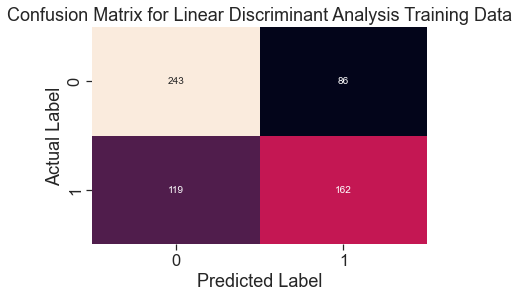

In [132]:
## Confusion matrix on the training data
models_names={lm:'Logistics Regression Model',lmgs:'Logistics Regression after Grid Search',lda:'Linear Discriminant Analysis'}

print('Accuracy for {} is'.format(models_names[lda]),'\n\n',accuracy_score(train_labels,pred_class_train))
print('\n')
print('Classification report for {} Training Data is'.format(models_names[lda]),'\n',
      classification_report(train_labels,pred_class_train))
print('\n')
sns.heatmap(confusion_matrix(train_labels,pred_class_train),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Training Data".format(models_names[lda]))
plt.show()

Accuracy for Linear Discriminant Analysis is 

 0.6412213740458015


Classification report for Linear Discriminant Analysis Testing Data is 
               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262





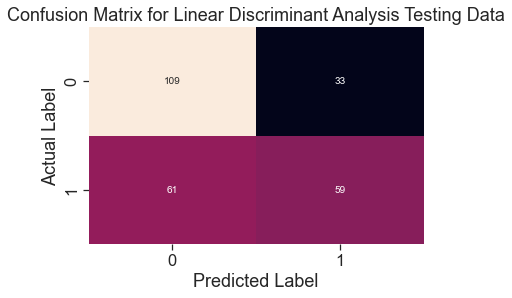

In [133]:
## Confusion matrix on the testing data
models_names={lm:'Logistics Regression Model',lmgs:'Logistics Regression after Grid Search',lda:'Linear Discriminant Analysis'}

print('Accuracy for {} is'.format(models_names[lda]),'\n\n',accuracy_score(test_labels,pred_class_test))
print('\n')
print('Classification report for {} Testing Data is'.format(models_names[lda]),'\n',
      classification_report(test_labels,pred_class_test))
print('\n')
sns.heatmap(confusion_matrix(test_labels,pred_class_test),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Testing Data".format(models_names[lda]))
plt.show()

In [134]:
# Training Data Probability Prediction
pred_prob_train = lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = lda.predict_proba(X_test)

In [135]:
pd.DataFrame(pred_prob_train).head()

,0,1
0,0.261849,0.738151
1,0.710383,0.289617
2,0.617657,0.382343
3,0.235165,0.764835
4,0.533171,0.466829


Area under Curve is 0.7331177189585609


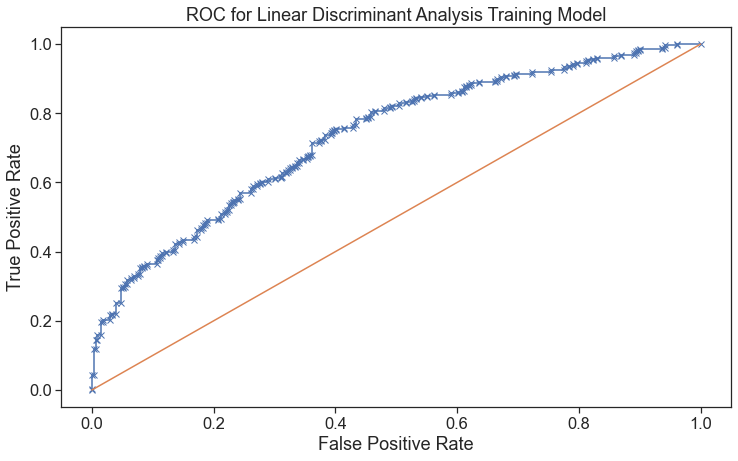

In [136]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,lda.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Linear Discriminant Analysis')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(train_labels,lda.predict_proba(X_train)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Linear Discriminant Analysis Training Model')
plt.show()

Area under Curve is 0.7144953051643192


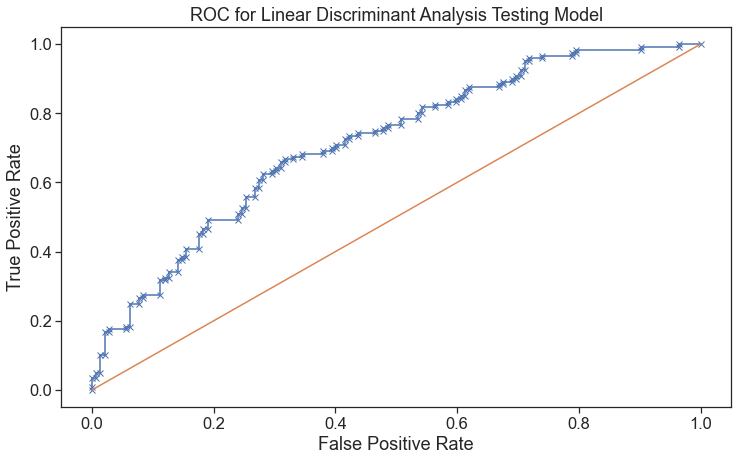

In [137]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,lda.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Linear Discriminant Analysis')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
print('Area under Curve is', roc_auc_score(test_labels,lda.predict_proba(X_test)[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Linear Discriminant Analysis Testing Model')
plt.show()

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


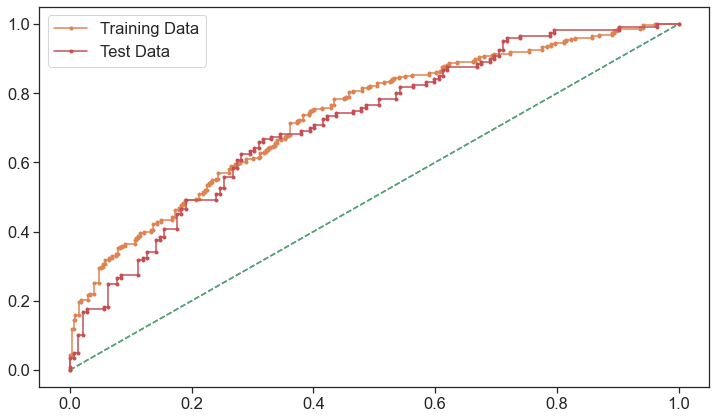

In [138]:
# AUC and ROC for the training data
plt.figure(figsize=(12,7))
# calculate AUC
auc = roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [139]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(train_labels)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(accuracy_score(train_labels,custom_cutoff_data),4))
    print('F1 Score',round(f1_score(train_labels,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 



In [140]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

Accuracy for Linear Discriminant Analysis with Cut-off is 

 0.6450381679389313


Classification report for Linear Discriminant Analysis Testing Data with Cut-off is 
               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262





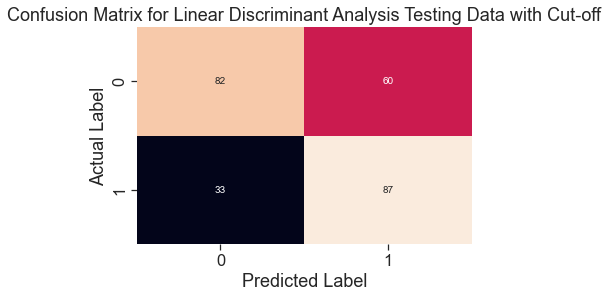

In [141]:
## Confusion matrix on the testing data
models_names={lm:'Logistics Regression Model',lmgs:'Logistics Regression after Grid Search',lda:'Linear Discriminant Analysis'}

print('Accuracy for {} with Cut-off is'.format(models_names[lda]),'\n\n',accuracy_score(test_labels,data_pred_custom_cutoff))
print('\n')
print('Classification report for {} Testing Data with Cut-off is'.format(models_names[lda]),'\n',
      classification_report(test_labels,data_pred_custom_cutoff))
print('\n')
sns.heatmap(confusion_matrix(test_labels,data_pred_custom_cutoff),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix for {} Testing Data with Cut-off".format(models_names[lda]))
plt.show()

Area under the curve for Linear Discriminant Analysis is 0.7144953051643192
Area under the curve for Linear Discriminant Analysis with Cut-Off is 0.6512323943661972
AUC for the Testing Data with Default Cut-off: 0.714
AUC for the Test Data with New Cut-off: 0.651


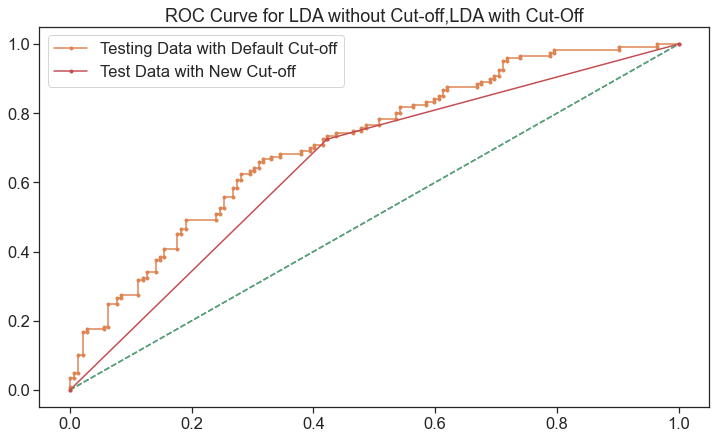

In [142]:
print('Area under the curve for Linear Discriminant Analysis is',roc_auc_score(test_labels,lda.predict_proba(X_test)[:,1]))
print('Area under the curve for Linear Discriminant Analysis with Cut-Off is',roc_auc_score(test_labels,data_pred_custom_cutoff))
# AUC and ROC for the testing data
plt.figure(figsize=(12,7))
# calculate AUC
auc = roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Testing Data with Default Cut-off: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Testing Data with Default Cut-off')

# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,data_pred_custom_cutoff)
print('AUC for the Test Data with New Cut-off: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,data_pred_custom_cutoff)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data with New Cut-off')
# show the plot
plt.legend(loc='best')
plt.title('ROC Curve for {}'.format('LDA without Cut-off,LDA with Cut-Off'))
plt.show()

Area under the curve for Logistic Regression Model is 0.7352594403400794
Area under the curve for Logistic Regression Model after Grid Search is 0.7340479615788165
Area under the curve for Linear Discriminant Analysis is 0.7331177189585609


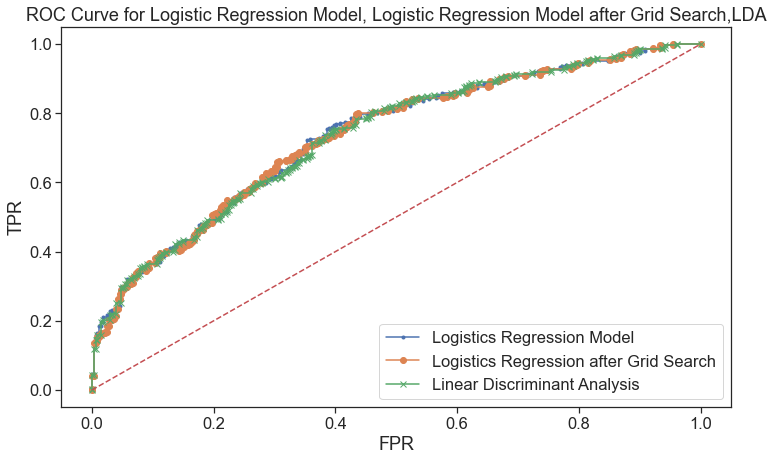

In [143]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(train_labels,lm.predict_proba(X_train)[:,1]))
print('Area under the curve for Logistic Regression Model after Grid Search is',roc_auc_score(train_labels,best_model.predict_proba(X_train)[:,1]))
print('Area under the curve for Linear Discriminant Analysis is',roc_auc_score(train_labels,lda.predict_proba(X_train)[:,1]))

plt.figure(figsize=(12,7))
fpr_lm, tpr_lm, thresholds = roc_curve(train_labels,lm.predict_proba(X_train)[:,1])
plt.plot(fpr_lm, tpr_lm, marker='.') 

fpr_lmgs, tpr_lmgs, thresholds = roc_curve(train_labels,best_model.predict_proba(X_train)[:,1])
plt.plot(fpr_lmgs, tpr_lmgs, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(train_labels,lda.predict_proba(X_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model, Logistic Regression Model after Grid Search,LDA'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for Logistic Regression Model is 0.7168427230046949
Area under the curve for Logistic Regression Model after Grid Search is 0.7171361502347419
Area under the curve for Linear Discriminant Analysis is 0.7144953051643192
Area under the curve for Linear Discriminant Analysis with Cut-Off is 0.6512323943661972


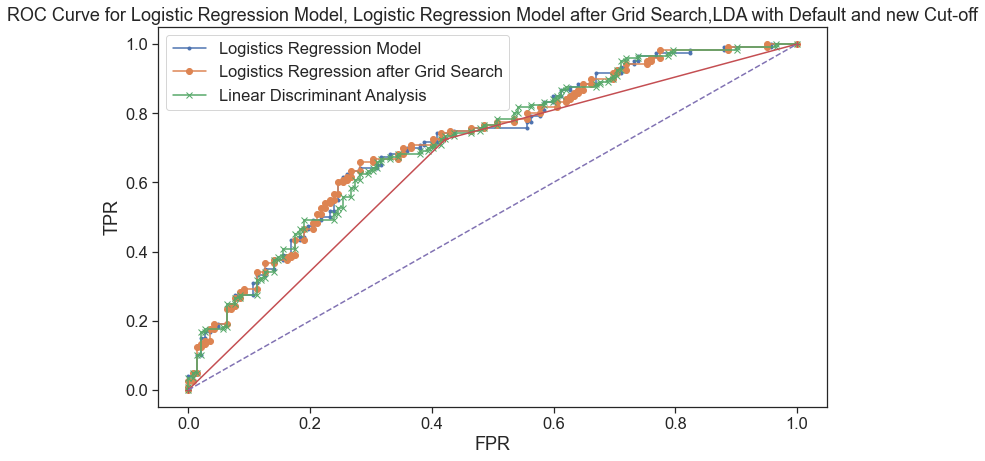

In [144]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(test_labels,lm.predict_proba(X_test)[:,1]))
print('Area under the curve for Logistic Regression Model after Grid Search is',roc_auc_score(test_labels,best_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Linear Discriminant Analysis is',roc_auc_score(test_labels,lda.predict_proba(X_test)[:,1]))
print('Area under the curve for Linear Discriminant Analysis with Cut-Off is',roc_auc_score(test_labels,data_pred_custom_cutoff))

plt.figure(figsize=(12,7))
fpr_lm, tpr_lm, thresholds = roc_curve(test_labels,lm.predict_proba(X_test)[:,1])
plt.plot(fpr_lm, tpr_lm, marker='.') 

fpr_lmgs, tpr_lmgs, thresholds = roc_curve(test_labels,best_model.predict_proba(X_test)[:,1])
plt.plot(fpr_lmgs, tpr_lmgs, marker='o') 

fpr_lda, tpr_lda, thresholds = roc_curve(test_labels,lda.predict_proba(X_test)[:,1])
plt.plot(fpr_lda, tpr_lda, marker='x',) 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels,data_pred_custom_cutoff)
plt.plot(fpr_ann, tpr_ann, marker='+',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model, Logistic Regression Model after Grid Search,LDA with Default and new Cut-off'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [145]:
lm.coef_

array([[-1.64614166e-05, -5.70725241e-02,  6.03474110e-02,
        -1.34883481e+00, -4.89435926e-02,  1.26648030e+00]])